In [1]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np

# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Resampling
from sklearn.utils import resample

# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Data Scaling
from sklearn.preprocessing import MinMaxScaler



In [2]:
data=pd.read_csv('heartdataset.csv')
data.shape

(4240, 16)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [5]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
#handling missing values with mode
data["glucose"].fillna((data["glucose"].mode())[0], inplace=True)

In [8]:
#Handling missing values
data.dropna(inplace=True)
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

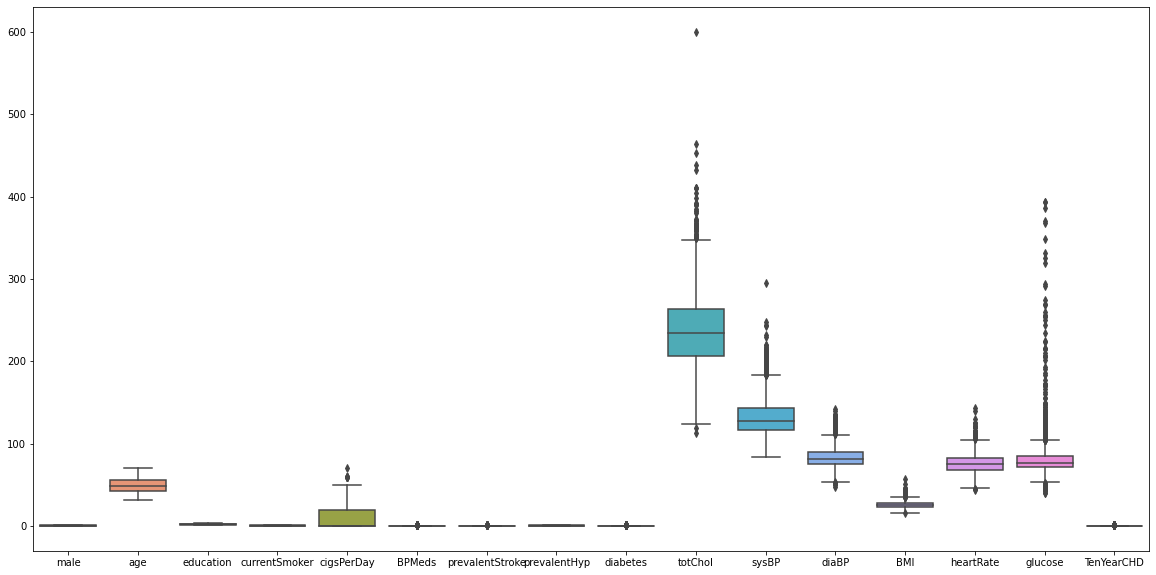

In [9]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.022696,0.013049,0.200757,0.325601,-0.050022,-0.003622,0.007670,0.016900,-0.068703,-0.033434,0.058723,0.079214,-0.115969,0.008608,0.091245
age,-0.022696,1.000000,-0.161089,-0.213671,-0.190600,0.128447,0.045064,0.304496,0.104776,0.269799,0.389814,0.206171,0.134673,-0.008337,0.115845,0.229725
education,0.013049,-0.161089,1.000000,0.018365,0.006507,-0.010113,-0.028570,-0.081464,-0.034756,-0.023161,-0.128237,-0.063298,-0.136251,-0.058110,-0.031169,-0.054168
currentSmoker,0.200757,-0.213671,0.018365,1.000000,0.770872,-0.048914,-0.032530,-0.105762,-0.040224,-0.048890,-0.130899,-0.109851,-0.164975,0.052285,-0.051922,0.022234
cigsPerDay,0.325601,-0.190600,0.006507,0.770872,1.000000,-0.043981,-0.033951,-0.066930,-0.036207,-0.026404,-0.087943,-0.051265,-0.087834,0.068029,-0.051245,0.059124
BPMeds,-0.050022,0.128447,-0.010113,-0.048914,-0.043981,1.000000,0.127485,0.259582,0.047643,0.086179,0.260403,0.195993,0.103018,0.016321,0.054261,0.089867
prevalentStroke,-0.003622,0.045064,-0.028570,-0.032530,-0.033951,0.127485,1.000000,0.067277,0.009545,0.007987,0.055160,0.049279,0.031398,-0.012108,0.016471,0.044834
prevalentHyp,0.007670,0.304496,-0.081464,-0.105762,-0.066930,0.259582,0.067277,1.000000,0.075005,0.164943,0.693882,0.615489,0.304473,0.151198,0.084334,0.176236
diabetes,0.016900,0.104776,-0.034756,-0.040224,-0.036207,0.047643,0.009545,0.075005,1.000000,0.044545,0.101041,0.051252,0.082777,0.051465,0.609132,0.089297
totChol,-0.068703,0.269799,-0.023161,-0.048890,-0.026404,0.086179,0.007987,0.164943,0.044545,1.000000,0.214536,0.171537,0.123195,0.088375,0.049247,0.082552


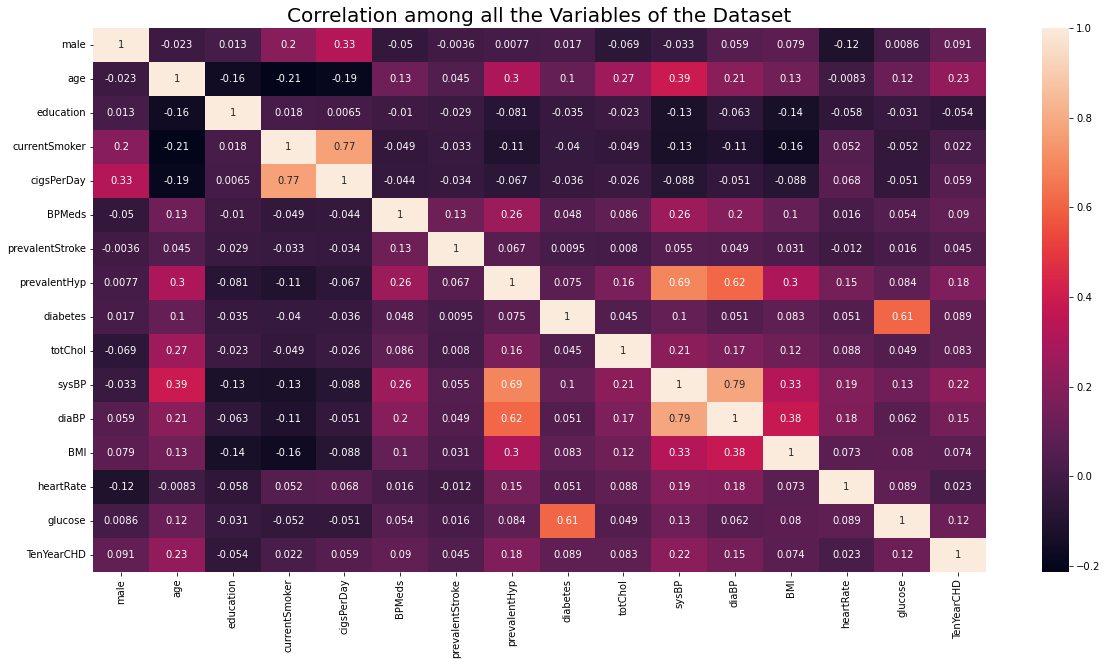

In [10]:
#Checking relationship between variables
cor=data.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns.values,yticklabels=cor.columns.values,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

In [13]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
data.shape

male                1.00
age                14.00
education           2.00
currentSmoker       1.00
cigsPerDay         20.00
BPMeds              0.00
prevalentStroke     0.00
prevalentHyp        1.00
diabetes            0.00
totChol            57.00
sysBP              26.50
diaBP              14.50
BMI                 4.93
heartRate          15.00
glucose            13.00
TenYearCHD          0.00
dtype: float64


(3989, 16)

In [14]:
#Removing outliers
df = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(2913, 16)

In [15]:
#data reduction using feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
y = df['TenYearCHD']
x= df.drop(['TenYearCHD'], axis=1)
colnames=data.columns
model= RandomForestClassifier()
model.fit(x,y)

RandomForestClassifier()

In [16]:
rfe=RFE(model,n_features_to_select=1,verbose=2)
fit=rfe.fit(x,y)

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [17]:
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), colnames)))

Features sorted by their rank:
[(1, 'glucose'), (2, 'heartRate'), (3, 'BMI'), (4, 'diaBP'), (5, 'sysBP'), (6, 'totChol'), (7, 'diabetes'), (8, 'prevalentHyp'), (9, 'prevalentStroke'), (10, 'BPMeds'), (11, 'cigsPerDay'), (12, 'currentSmoker'), (13, 'education'), (14, 'age'), (15, 'male')]


In [18]:
data=df[['male','age','education','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']]
data.head()

,male,age,education,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0
4,0,46,3.0,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0


In [19]:
X = data.drop('TenYearCHD', axis=1)
Y = data['TenYearCHD'] # class is the output
X.head()

,male,age,education,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,20.0,245.0,127.5,80.0,25.34,75.0,70.0
4,0,46,3.0,23.0,285.0,130.0,84.0,23.10,85.0,85.0
5,0,43,2.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0


In [20]:
#Data transformation using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
X_copy = X.copy() #We create a copy so we can still refer to the original dataframe later
scaler = MinMaxScaler()
X_columns = X.columns
X_scaled = pd.DataFrame(scaler.fit_transform(X_copy), columns=X_columns)
X_scaled.head()

,male,age,education,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,0.189189,1.000000,0.00,0.312217,0.214286,0.267857,0.557090,0.576271,0.470588
1,0.0,0.378378,0.333333,0.00,0.561086,0.367347,0.464286,0.650558,0.830508,0.450980
2,1.0,0.432432,0.000000,0.40,0.538462,0.433673,0.446429,0.470526,0.491525,0.333333
3,0.0,0.378378,0.666667,0.46,0.719457,0.459184,0.517857,0.351567,0.661017,0.627451
4,0.0,0.297297,0.333333,0.00,0.461538,0.969388,0.982143,0.733935,0.525424,0.901961
